In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv("zoo_data(For Decision Tree Program).csv")

df.head()

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [2]:

# X = df.values[:,0:4]
# y = df.values[:,-1]

X = df.drop("1.7",axis=1)
y = df["1.7"]
y.unique()


array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [3]:

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

model = DecisionTreeClassifier(criterion="entropy")
model.fit(xtrain,ytrain)
pred_y = np.array(model.predict(xtest))

print("confusion_matrix:\n",confusion_matrix(ytest,pred_y))
print("accuracy_score\n",accuracy_score(ytest,pred_y))
print("classification_report\n",classification_report(ytest,pred_y))


confusion_matrix:
 [[12  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  4]]
accuracy_score
 0.9666666666666667
classification_report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4

    accuracy                           0.97        30
   macro avg       0.79      0.86      0.81        30
weighted avg       0.95      0.97      0.96        30



C:\Users\91935\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91935\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91935\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


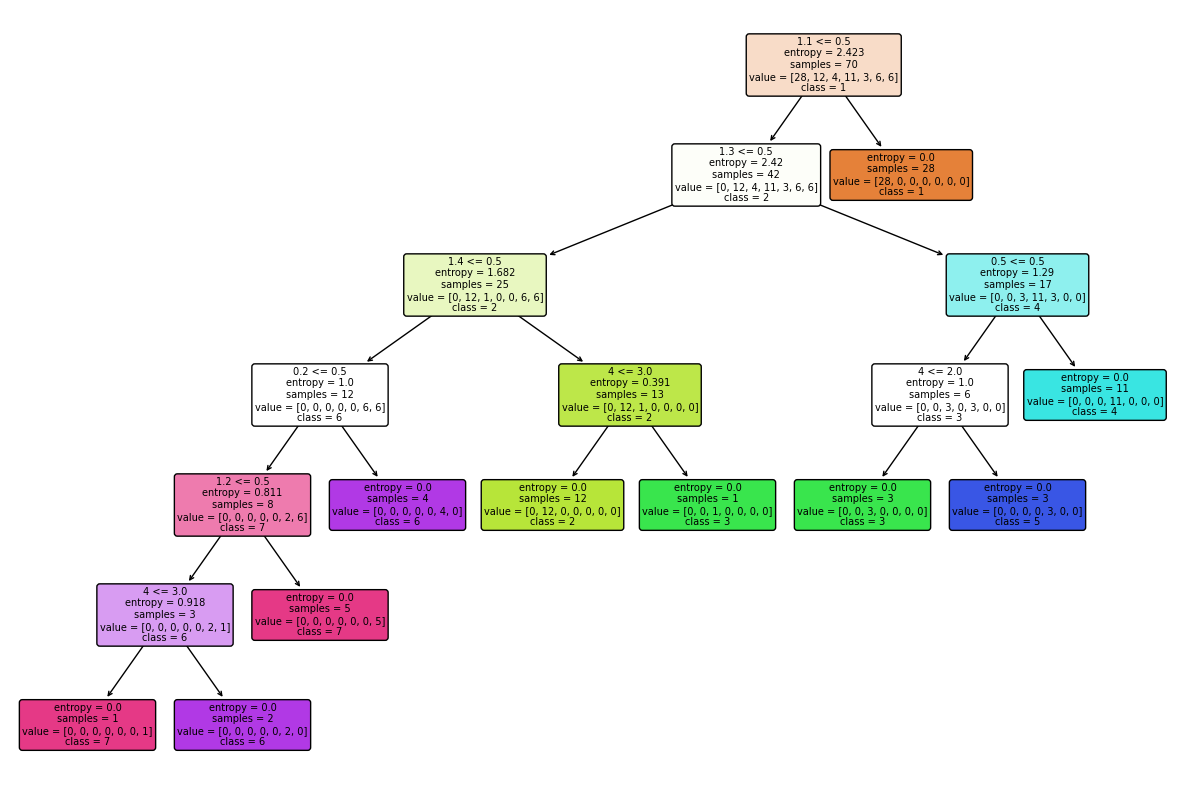

In [4]:
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=list(xtrain.columns), class_names=list(map(str, model.classes_)),rounded=True)
plt.show()